Установка библиотек (зависимостей)

In [120]:
%pip install pandas==2.2.1
%pip install matplotlib==3.8.3
%pip install scikit-learn==1.4.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Загрузка данных, отображение признаков

In [87]:
import pandas


df = pandas.read_json('dataset/ulpressa.private.json')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12042 entries, 0 to 12041
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     12042 non-null  int64 
 1   has_photo              12042 non-null  bool  
 2   followers_count        12042 non-null  int64 
 3   sex                    12042 non-null  int64 
 4   bdate                  12042 non-null  object
 5   relation               12042 non-null  object
 6   country_id             12042 non-null  object
 7   country                12042 non-null  object
 8   city_id                12042 non-null  object
 9   city                   12042 non-null  object
 10  home_town              12042 non-null  object
 11  status                 12042 non-null  object
 12  site                   12042 non-null  bool  
 13  facebook               12042 non-null  bool  
 14  twitter                12042 non-null  bool  
 15  instagram              1

Пример визуализации распределения данных

<Axes: xlabel='sex'>

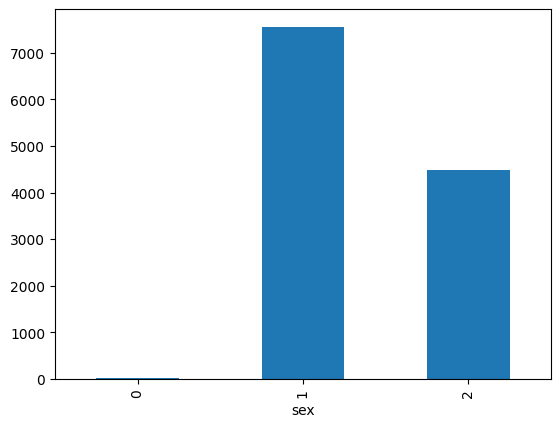

In [88]:
df["sex"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='country'>

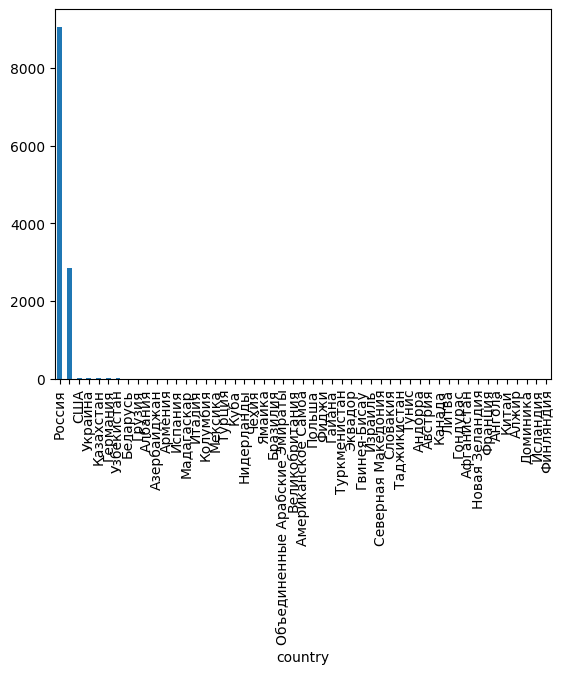

In [89]:
df["country"].value_counts().plot(kind="bar")

Удаление строк с пустыми значениями пола и даты рождения

In [90]:
df = df[df["sex"] != 0]
df = df[df["bdate"] != ""]

print(df.shape[0])
df.head()

6462


,id,has_photo,followers_count,sex,bdate,relation,country_id,country,city_id,city,...,life_main,smoking,alcohol,relatives,occupation_type,occupation_place_name,universities,schools,career,military
1,-5585019487869380024,True,492,2,08.06.2007,4,1,Россия,,,...,,,,"[child, child]",university,МГТУ им. Н. Э. Баумана,"[{'id': 250, 'name': 'МГТУ им. Н. Э. Баумана',...",,,"[{'id': 0, 'unit_id': 174294, 'unit': 'МГТУ им..."
3,1766961194847351116,True,1329,2,23.06.1988,4,1,Россия,149,Ульяновск,...,,,,"[parent, child, child]",work,Ведущие мероприятий в ульяновске,"[{'id': 870, 'name': 'УлГТУ', 'country_id': 1,...","[{'id': 110223, 'name': 'Городской лицей при У...","[{'id': 0, 'group_id': 77701457, 'company': ''...",
7,6086544381325964175,True,417,2,06.04.1965,0,1,Россия,149,Ульяновск,...,,,,[child],university,РАНХиГС при Президенте РФ (бывш. АНХ при Прави...,"[{'id': 4337, 'name': 'РУК (бывш. МУПК)', 'cou...","[{'id': 27097, 'name': 'Школа № 1', 'country_i...",,"[{'id': 0, 'unit_id': 10671699, 'unit': 'Ленин..."
9,-4448845166220842578,True,690,2,10.07.1986,4,1,Россия,1,Москва,...,0,0,0,,university,УлГТУ,"[{'id': 870, 'name': 'УлГТУ', 'country_id': 1,...","[{'id': 209028, 'name': 'Гимназия №1 им. Ленин...",,
12,1767843902261235620,True,769,2,12.04.1986,,1,Россия,149,Ульяновск,...,,,,,,,,,,


Определение возраста по дате рождения

In [91]:
from datetime import date, datetime


def get_age(bdate: str) -> int:
    today: date = date.today()
    birthdate: date = datetime.strptime(bdate, "%d.%m.%Y")
    age: int = (
        today.year
        - birthdate.year
        - ((today.month, today.day) < (birthdate.month, birthdate.day))
    )
    return age


df["age"] = df.apply(lambda val: get_age(val["bdate"]), axis = 1)

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6462.0,5.243764e+16,5.333966e+18,-9.217054e+18,-4.584834e+18,-1.994756e+16,4.629234e+18,9.217641e+18
followers_count,6462.0,5.008189e+02,1.066260e+03,0.000000e+00,6.200000e+01,1.780000e+02,4.900000e+02,1.429500e+04
sex,6462.0,1.395853e+00,4.890709e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
age,6462.0,4.283519e+01,1.547430e+01,1.400000e+01,3.300000e+01,4.100000e+01,5.200000e+01,1.230000e+02


Удаление строк, в которых возраст превышает 90 лет

In [92]:
df = df[df["age"] <= 90]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,6388.0,5.845060e+16,5.328330e+18,-9.217054e+18,-4.567282e+18,-1.622378e+16,4.629969e+18,9.217641e+18
followers_count,6388.0,4.980326e+02,1.062479e+03,0.000000e+00,6.200000e+01,1.770000e+02,4.880000e+02,1.429500e+04
sex,6388.0,1.393550e+00,4.885753e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
age,6388.0,4.202740e+01,1.356860e+01,1.400000e+01,3.300000e+01,4.000000e+01,5.200000e+01,8.900000e+01


Получение уникальных значений в колонке для векторизации

In [93]:
df["occupation_type"].unique()

array(['university', 'work', '', 'school'], dtype=object)

Векторизация

In [94]:
dict = {
    "": 0,
    "school": 1,
    "university": 2,
    "work": 3
}

df["parent"] = df.apply(
    lambda val: 1 if "child" in val["relatives"] and val["age"] >= 18 else 0, axis=1)
df["occupation"] = df.apply(lambda val: dict[val["occupation_type"]], axis=1)
df["universities"] = df.apply(lambda val: 1 if val["universities"] else 0, axis=1)
df["schools"] = df.apply(lambda val: 1 if val["schools"] else 0, axis=1)
df["career"] = df.apply(lambda val: 1 if val["career"] else 0, axis=1)
df["military"] = df.apply(lambda val: 1 if val["military"] else 0, axis=1)
df["relation"] = df["relation"].replace("", -1)
df["political"] = df["political"].replace("", -1)
df["people_main"] = df["people_main"].replace("", -1)
df["life_main"] = df["life_main"].replace("", -1)
df["smoking"] = df["smoking"].replace("", -1)
df["alcohol"] = df["alcohol"].replace("", -1)

/var/folders/rg/tppcrnhx45335twpt226wpf00000gn/T/ipykernel_62654/216919261.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["relation"] = df["relation"].replace("", -1)
/var/folders/rg/tppcrnhx45335twpt226wpf00000gn/T/ipykernel_62654/216919261.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["political"] = df["political"].replace("", -1)
/var/folders/rg/tppcrnhx45335twpt226wpf00000gn/T/ipykernel_62654/216919261.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

Удаление столбцов

In [95]:
df = df.drop(
    columns=[
        "id",
        "has_photo",
        "bdate",
        "country",
        "country_id",
        "city",
        "city_id",
        "home_town",
        "site",
        "facebook",
        "twitter",
        "instagram",
        "mobile_phone",
        "status",
        "activities",
        "interests",
        "books",
        "movies",
        "music",
        "tv",
        "games",
        "quotes",
        "about",
        "inspired_by",
        "religion",
        "occupation_place_name",
        "occupation_type",
        "relatives",
        "age",
        # "followers_count",
        # "people_main",
        # "life_main",
        # "universities",
        # "schools",
        # "relation",
        # "smoking",
        # "alcohol",
        # "political",
    ]
)
print(df.shape[0])
df.head()

6388


,followers_count,sex,relation,political,people_main,life_main,smoking,alcohol,universities,schools,career,military,parent,occupation
1,492,2,4,-1,-1,-1,-1,-1,1,0,0,1,0,2
3,1329,2,4,3,-1,-1,-1,-1,1,1,1,0,1,3
7,417,2,0,-1,-1,-1,-1,-1,1,1,0,1,1,2
9,690,2,4,3,0,0,0,0,1,1,0,0,0,2
12,769,2,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6388 entries, 1 to 12041
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   followers_count  6388 non-null   int64
 1   sex              6388 non-null   int64
 2   relation         6388 non-null   int64
 3   political        6388 non-null   int64
 4   people_main      6388 non-null   int64
 5   life_main        6388 non-null   int64
 6   smoking          6388 non-null   int64
 7   alcohol          6388 non-null   int64
 8   universities     6388 non-null   int64
 9   schools          6388 non-null   int64
 10  career           6388 non-null   int64
 11  military         6388 non-null   int64
 12  parent           6388 non-null   int64
 13  occupation       6388 non-null   int64
dtypes: int64(14)
memory usage: 748.6 KB


Формирование тестовой и обучающей выборок данных

In [97]:
from sklearn.model_selection import train_test_split

# Задание фиксированного случайного состояния для воспроизводимости результатов
rand = 9
# Выделение признака, который модель должна предсказать
y = df["sex"]
# Формирование множества признаков, на основе которых модель будет обучаться (удаление столбца с y)
X = df.drop(["sex"], axis=1).copy()
X = X.apply(pandas.to_numeric, errors="coerce")
X.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=rand
)

Определение линейной корреляции признаков с целевым признаком с помощью корреляции Пирсона

In [98]:
corr = df.corr()
abs(corr["sex"]).sort_values(ascending=False)

sex                1.000000
military           0.165632
alcohol            0.087615
political          0.087313
smoking            0.081364
parent             0.074025
life_main          0.064996
people_main        0.055138
career             0.045260
schools            0.028244
occupation         0.020659
followers_count    0.017209
relation           0.002275
universities       0.000877
Name: sex, dtype: float64

Создание моделей для предсказания возраста

In [99]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model, tree, neighbors, ensemble, neural_network

reg_models = {
    # Обобщенные линейные модели (GLM-модели)
    "linear": {"model": linear_model.LinearRegression(n_jobs=-1)},
    "linear_poly": {
        "model": make_pipeline(
            PolynomialFeatures(degree=2),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "linear_interact": {
        "model": make_pipeline(
            PolynomialFeatures(interaction_only=True),
            linear_model.LinearRegression(fit_intercept=False, n_jobs=-1),
        )
    },
    "ridge": {"model": linear_model.RidgeCV()},
    # Деревья
    "decision_tree": {
        "model": tree.DecisionTreeRegressor(max_depth=7, random_state=rand)
    },
    # Ближайшие соседи
    "knn": {"model": neighbors.KNeighborsRegressor(n_neighbors=7, n_jobs=-1)},
    # Ансамблевые методы
    "random_forest": {
        "model": ensemble.RandomForestRegressor(
            max_depth=7, random_state=rand, n_jobs=-1
        )
    },
    # Нейронные сети
    "mlp": {
        "model": neural_network.MLPRegressor(
            hidden_layer_sizes=(21,),
            max_iter=500,
            early_stopping=True,
            random_state=rand,
        )
    },
}

Обучение и оценка регрессионных моделей

In [100]:
import math
from sklearn import metrics

for model_name in reg_models.keys():
    print(f"Model: {model_name}")
    fitted_model = reg_models[model_name]["model"].fit(X_train, y_train)
    y_train_pred = fitted_model.predict(X_train.values)
    y_test_pred = fitted_model.predict(X_test.values)
    reg_models[model_name]["fitted"] = fitted_model
    reg_models[model_name]["preds"] = y_test_pred
    reg_models[model_name]["RMSE_train"] = math.sqrt(
        metrics.mean_squared_error(y_train, y_train_pred)
    )
    reg_models[model_name]["RMSE_test"] = math.sqrt(
        metrics.mean_squared_error(y_test, y_test_pred)
    )
    reg_models[model_name]["R2_test"] = metrics.r2_score(y_test, y_test_pred)

/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model: linear
Model: linear_poly


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Model: linear_interact


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Model: ridge


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with f

Model: decision_tree
Model: knn
Model: random_forest


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model: mlp


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Визуализация результатов оценки

In [101]:
reg_metrics = pandas.DataFrame.from_dict(reg_models, "index")[
    ["RMSE_train", "RMSE_test", "R2_test"]
]
reg_metrics.sort_values(by="RMSE_test").style.background_gradient(
    cmap="viridis", low=1, high=0.3, subset=["RMSE_train", "RMSE_test"]
).background_gradient(cmap="plasma", low=0.3, high=1, subset=["R2_test"])

,RMSE_train,RMSE_test,R2_test
random_forest,0.461333,0.466438,0.064641
linear,0.478810,0.468751,0.055344
ridge,0.478811,0.468764,0.055291
linear_interact,0.474579,0.471482,0.044305
linear_poly,0.473493,0.472794,0.038979
decision_tree,0.465039,0.474001,0.034064
mlp,0.494328,0.488880,-0.027529
knn,0.450362,0.514707,-0.138963


In [102]:
text_tree = tree.export_text(
    reg_models["decision_tree"]["fitted"],
    feature_names=X_train.columns.values.tolist(),
)
print(text_tree)

|--- military <= 0.50
|   |--- parent <= 0.50
|   |   |--- alcohol <= 2.50
|   |   |   |--- followers_count <= 16.50
|   |   |   |   |--- political <= 2.00
|   |   |   |   |   |--- followers_count <= 5.50
|   |   |   |   |   |   |--- relation <= 4.50
|   |   |   |   |   |   |   |--- value: [1.57]
|   |   |   |   |   |   |--- relation >  4.50
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- followers_count >  5.50
|   |   |   |   |   |   |--- life_main <= 0.50
|   |   |   |   |   |   |   |--- value: [1.46]
|   |   |   |   |   |   |--- life_main >  0.50
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- political >  2.00
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- followers_count >  16.50
|   |   |   |   |--- relation <= -0.50
|   |   |   |   |   |--- followers_count <= 602.00
|   |   |   |   |   |   |--- occupation <= 2.50
|   |   |   |   |   |   |   |--- value: [1.48]
|   |   |   |   |   |   |--- occupation >  2.50
|   |   |   |   |  

In [103]:
dt_imp_df = pandas.DataFrame(
    {
        "feature": X_train.columns.values.tolist(),
        "importance": reg_models["decision_tree"]["fitted"].feature_importances_,
    }
).sort_values(by="importance", ascending=False)
dt_imp_df

,feature,importance
0,followers_count,0.263296
10,military,0.259748
1,relation,0.099629
11,parent,0.097281
6,alcohol,0.092766
2,political,0.073152
3,people_main,0.040497
4,life_main,0.030125
5,smoking,0.019135
12,occupation,0.013102


In [104]:
test_data1 = X_test.loc[2408, :]
print(test_data1)
print(reg_models["decision_tree"]["model"].predict([test_data1.values]))
print(round(reg_models["decision_tree"]["model"].predict([test_data1.values])[0]))
print(y_test.loc[2408])

followers_count    3566
relation              6
political             3
people_main           2
life_main             1
smoking               0
alcohol               0
universities          1
schools               1
career                0
military              0
parent                0
occupation            2
Name: 2408, dtype: int64
[1.34021005]
1
1


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [105]:
test_data2 = X_test.loc[7698, :]
print(test_data2)
print(reg_models["decision_tree"]["model"].predict([test_data2.values]))
print(round(reg_models["decision_tree"]["model"].predict([test_data2.values])[0]))
print(y_test.loc[7698])

followers_count    844
relation             0
political           -1
people_main         -1
life_main           -1
smoking             -1
alcohol             -1
universities         1
schools              0
career               1
military             0
parent               0
occupation           3
Name: 7698, dtype: int64
[1.34021005]
1
1


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [106]:
test_data3 = X_test.loc[5342, :]
print(test_data3)
print(reg_models["decision_tree"]["model"].predict([test_data3.values]))
print(round(reg_models["decision_tree"]["model"].predict([test_data3.values])[0]))
print(y_test.loc[5342])

followers_count    483
relation            -1
political           -1
people_main         -1
life_main           -1
smoking             -1
alcohol             -1
universities         0
schools              0
career               0
military             0
parent               0
occupation           3
Name: 5342, dtype: int64
[1.55]
2
2


/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/user/Projects/python/iias/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
